In [5]:
#Import libraries
from predictions import prediction
import pandas as pd

#Read variable excel
variables_df = pd.read_csv('variables_df.csv', index_col=[0])

#Extract variables
variables_dict = variables_df.to_dict()['0']
batch_size = int(variables_dict['batch_size_valid'])
window_size = int(variables_dict['window_size'])
sentiment = bool(variables_dict['sentiment'])
sentiment_type = variables_dict['sentiment_type']
ticker = variables_dict['ticker']
excel_reports = variables_dict['excel_reports']
entry_candle = variables_dict['entry_candle']
model_name = variables_dict['model_name']
indicator1 = int(variables_dict['indicator1'])
indicator2 = int(variables_dict['indicator2'])
indicator3 = int(variables_dict['indicator3'])
aggr_function = variables_dict['aggr_function']
condition = bool(variables_dict['condition'])
period = variables_dict['period']
formation_window = int(variables_dict['formation_window'])

acceptance = float(variables_dict['acceptance'])
penalization = float(variables_dict['penalization'])

# Read excels
x_test = pd.read_csv(f'{ticker}_test_data.csv', index_col=[0])
x_test_x = pd.read_csv(f'{ticker}_x_test_x.csv', index_col=[0])
news_df = pd.read_excel(
        f'{ticker}_sentiment_analysis_final.xlsx', index_col=[0])
Dates = pd.read_csv(f'{ticker}_Dates.csv', index_col=[0])
Dates = Dates.iloc[:, 0]

#Run it
performance_df = prediction()

31/31 [==============================] - 2s 8ms/step
--------> GetTensoredDataset completed

--------> ReverseNormalization completed

--------> GetFinalDataframe



In [6]:
from final_evaluation import GetModelPerformance

print(f"ticker: {str.upper(ticker)}\n")

GetModelPerformance = GetModelPerformance()

GetModelPerformance.fit(acceptance=acceptance,
                            penalization=penalization,
                            entry_candle='Current Open',  # Current Open
                            budget=10000,
                            window_size=window_size,
                            export_excel=False,
                            excel_path=excel_reports,
                            sentiment=sentiment)

trades_df = GetModelPerformance.transform(performance_df)



ticker: HP

Formations:  31
period: 2022-06-06 - 2023-01-16
Entry Candle:  Current Open

Total Trades:  14
Profit Trades:  13
Loss Trades:  1

Win Ratio: 93.0 %
Loss Ratio: 7 %

Trade nr with exact TP:  11
Ratio of exact TP: 78.57 %

Average profit per trade:  443

Gross profit:  6196
Gross loss:  -310

Net profit:  5886


In [7]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle=entry_candle,
                             budget=10000,
                             window_size=window_size,
                             export_excel=False,
                             excel_path=excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)

--------> GetPerformanceReport completed



<Figure size 1600x640 with 0 Axes>

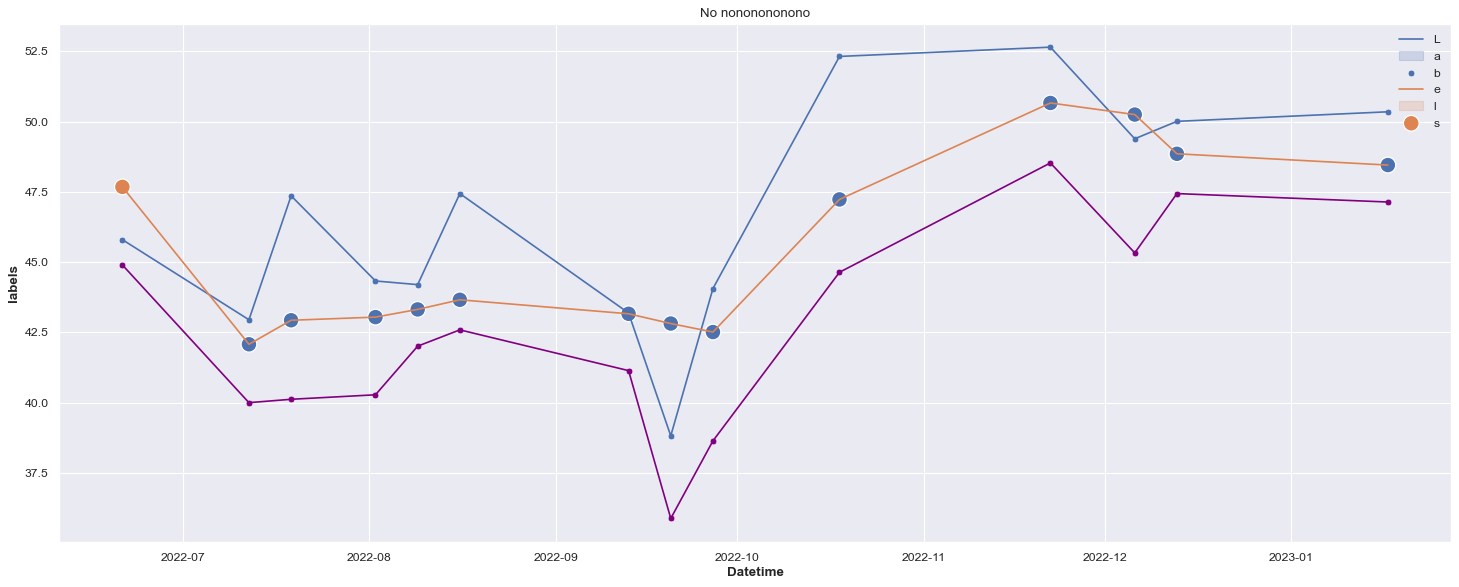

In [145]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
figure(figsize=(20, 8), dpi=80)

df_plot = trades_df_final[['Datetime','labels','prediction','Entry','profit']]
df_plot = df_plot[df_plot.labels != 'nn']
df_plot['loss'] = df_plot['profit'].apply(lambda x: 1 if x < 0 else 0)

import seaborn as sns
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
figure(figsize=(20, 8), dpi=80)

line_labels = sns.lineplot(x='Datetime', 
                    y='labels', 
                    data=df_plot)

scatter_labels = sns.scatterplot(x='Datetime', 
                    y='labels', 
                    data=df_plot)

line_prediction = sns.lineplot(x='Datetime', 
                    y='prediction', 
                    data=df_plot,palette="cool")

scatter_prediction = sns.scatterplot(x='Datetime', 
                    y='prediction', 
                    data=df_plot,hue=df_plot.loss,s=200)

line_entry = sns.lineplot(x='Datetime', 
                    y='Entry', 
                    data=df_plot,color='purple')

scatter_entry= sns.scatterplot(x='Datetime', 
                    y='Entry', 
                    data=df_plot,color='purple')                



plt.xticks(rotation=0)
plt.legend('Labels')
plt.title('No nononononono')
plt.annotate("Iris Dataset", (3, 5), fontsize=50)
plt.show()
#plt.tight_layout()
#df_plot

In [146]:
trades_df_final

,Open,High,Low,Close,EMA5,EMA8,EMA21,labels,prediction,TwitterSentiment,Datetime,profit,trade,Entry,Performance
0,51.200001,54.590000,47.930000,49.549999,49.151339,48.035346,42.815336,nn,nn,-0.06755,2022-06-06,-1.390003,1,nn,nn
1,47.560001,48.020000,38.040001,38.860001,45.720893,45.996380,42.455760,nn,nn,0.10120,2022-06-13,-1.390003,1,nn,nn
2,39.720001,44.540001,37.340000,43.939999,45.127261,45.539407,42.590691,nn,nn,0.04590,2022-06-20,-1.390003,1,nn,nn
3,44.900002,45.799999,41.410000,43.509998,45.720893,45.996380,42.455760,45.799999,47.677495,0.00000,2022-06-21,-1.390003,1,44.900002,-310.0
4,44.900002,45.799999,41.410000,43.509998,44.588174,45.088427,42.674264,nn,nn,0.01260,2022-06-27,2.077652,2,nn,nn
5,42.150002,43.470001,38.029999,42.980000,44.052116,44.619888,42.702058,nn,nn,-0.01545,2022-07-04,2.077652,2,nn,nn
6,42.000000,42.779999,37.099998,38.869999,42.324743,43.342135,42.353689,nn,nn,0.02055,2022-07-11,2.077652,2,nn,nn
7,40.000000,42.950001,38.570000,39.400002,44.052116,44.619888,42.702058,42.950001,42.077652,0.00000,2022-07-12,2.077652,2,40.0,519.0
8,42.150002,43.470001,38.029999,42.980000,44.052116,44.619888,42.702058,nn,nn,-0.01545,2022-07-04,2.812124,3,nn,nn
9,42.000000,42.779999,37.099998,38.869999,42.324743,43.342135,42.353689,nn,nn,0.02055,2022-07-11,2.812124,3,nn,nn


In [18]:
from final_evaluation import MakeSinglePrediction

#model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

MakeSinglePrediction = MakeSinglePrediction()

fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date="2019-03-18",
                        end_date="2023-02-02",
                        interval=period, #1wk
                        progress=False,
                        condition=condition,
                        timeperiod1=indicator1,
                        timeperiod2=indicator2,
                        timeperiod3=indicator3,
                        debug=False,
                        budget=13500,
                        penalization=penalization,
                        acceptance=acceptance,
                        entry_candle='Current Close',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type = sentiment_type,
                        sentiment_aggr = aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.tail(formation_window)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method
final_trade_formation



Trading condition passed, you can make prediction

Entry price:  46.72


,Date,Open,High,Low,Close,EMA5,EMA8,EMA21,TwitterSentiment
1,2023-01-16,51.020000,51.250000,46.130001,46.919998,48.110313,48.128854,46.908286,0.173833
2,2023-01-23,47.139999,50.349998,46.090000,49.189999,48.470208,48.364664,47.115714,0.511400
3,2023-01-30,48.169998,49.779999,44.910000,46.720001,47.886806,47.999183,47.079740,0.022550



Ticker:  hp
1/1 [==============================] - 2s 2s/step

Entry candle (Current Close)

Budget:  13500

Entry price:  46.72
Prediction:  48.5
Expected Market move:  1.78
Expected Profit:  513.09


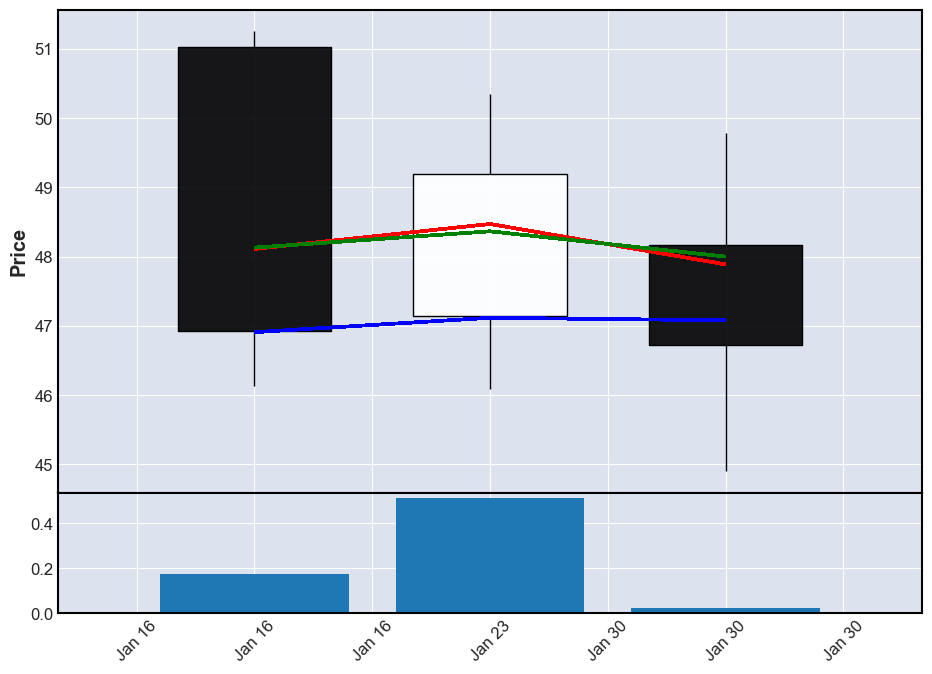

In [19]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)
